# 3. Couverture de portefeuille

TP à rendre dans deux semaines,
Notation 50% sur les TPs, 50% sur un test de validation des acquis (questions du type : grandes étapes de la méthode de bootstrap, à quels risques sommes nous exposés ?)

Comment réussir à se couvrir en utilisant 3 produits et non plus n produits, mais avec une courbe des taux non plate ?

Soit un portefeuille de trois actions composé de la manière suivante :
$Π(y_A,y_B,y_C) = P_A(y_A) + Φ_1 P_B(y_B) + Φ_2 P_C(y_C)$

Auparavant, nous supposions que :
- La courbe des taux est plate -> y est fixe
- La variation des taux est parrallèle -> $\partial y_A = \partial y_B = \partial y_C = \partial y$
- $\partial y < ε$

Désormais, nous avons relâché l'hypothèse 3 avec l'ajout du terme de convexité. **Nous relâchons maintenant l'hypothèse deux** en posant :

$\partial y_B=f(\partial y_A)$

$\partial Π(y_A) = \frac{\partial P_A}{\partial y_A}\partial y_A + Φ\frac{\partial P_B}{\partial y_B}f(\partial y_A)$ où on peut estimer f par moindre carré ordinaire (régression linéaire) non paramétrique.

**Nous relâchons maintenant l'hypothèse 1** en posant : $y_B = g(y_A)$

$\partial Π(y_A) = \frac{\partial P_A}{\partial y_A}\partial y_A + Φ\frac{\partial P_A}{\partial g}\frac{\partial g}{\partial y_A} f(\partial y_A)$

Si on réintroduit l'hypothèse deux :

$\partial Π(y_A) = \frac{\partial P_A}{\partial y_A}\partial y_A + Φ\frac{\partial P_A}{\partial g}\frac{\partial g}{\partial y_A} \partial y_A$


On sait que la valorisation d'une obligation est égale à la somme de ses cash flows actualisés :
$P(c,T,N) = \sum_{i=1}^N {\frac{CF_i}{(1+r_i)^i}}$

On cherche à couvrir notre portefeuille contre une variation des taux de $r_1,r_2,r_3,.. r_T$

![IMAGE 4](TP_03_img/img_4.png)

$\frac{\partial P}{\partial R}(c,T,N) = \sum_{i=1}^T{\frac{\partial(\frac{CF_i}{(1+r_i)^i})}{\partial r_i}}$

$D = \begin{bmatrix}
\frac{\partial P}{\partial r_1}\\
...\\
\frac{\partial P}{\partial r_T}
\end{bmatrix}$, 
$Φ=\begin{bmatrix}
Φ_1\\
...\\
Φ_T
\end{bmatrix}$, 
$M=\begin{bmatrix}
\frac{\partial P_1}{\partial r_1} & ... & \frac{\partial P_T}{\partial r_1}\\
... & ... & ...\\
\frac{\partial P_1}{\partial r_T} & ... & \frac{\partial P_T}{\partial r_T}
\end{bmatrix}$

$Φ = -DM^{-1}$

Entrons désormais en **temps continu** :
$P(r,T)=E[e^{-\int_0^T r_S d_S}]$ avec $r_S$ le taux court terme en s, $d_S$ la variable aléatoire (ici, on actualise simplement d'une manière différente).

Soit une obligation taux variable :
- Coupon = Euribor 3 mois
- Coupon trimestriel
- T = 1 an
- N = $100e^6$

![IMAGE 5](TP_03_img/img_5.png)

Si au temps $T_2$ : $x_2=2$%
- Versé au $T_1$ : 1 million
- Version au $T_2$ : 2 millions
=> la hausse du taux coûte 1 million

Le caplet (protège le détenteur contre une hausse du taux): $max(x_1-k,0)$ <= une option d'achat (call) qu'on active que si le taux est en hausse.

Avec :
- $x_1 =$ Variable aléatoire
- $c(T=T_2,K=0.01,x_1)=E[max(x_1-k,0)]e^{-\int_0^{T_1} r_S d_S}$

Avec le **modèle de Ho-Lee** (1986) : $\partial r_t= \theta \partial t + \sigma \partial W_t$ qui suppose que le taux fluctue autour d'une valeur de long terme et subis simplement des chocs régulièrement. Il ne tient pas compte de l'équilibre avec le marché monétaire.

Or, avec l'équilibre, les taux courts sont caractérisés par un phénomène de retour à la moyenne :
![IMAGE 6](TP_03_img/img_6.png)

Avec le **modèle de Vasicek** (1977) :

$\partial r_T = a(b-r_t)\partial t + \sigma \partial W_t$

avec :
- a > 0 : vitesse de retour vers b
- b : moyenne de long terme
- $\sigma$ : volatilité

![IMAGE 7](TP_03_img/img_7.png)

Néanmoins, ce modèle a été critiqué par le fait que $r_T$ peut être négatif.

Pour résoudre **Vasicek**, on peut utiliser le **Lemme d'Itô** :

Si $f \in \zeta^2(\Re^+ x \Re, \Re)$ alors $\partial f = \frac{\partial f}{\partial t}\partial t + \frac{\partial f}{\partial x}\partial x + \frac{1}{2}\sigma^2 \frac{\partial^2 f}{\partial x^2}\partial t^2$

On pose : $f(t,r)=re^{at}$ donc $\frac{\partial f}{\partial t}(x,r)=-are^{at}$ et $\frac{\partial f}{\partial t^2}(x,r)=0$ <= vérifier les x ici ?

$\partial f = -are^{at}\partial t + e^{at}(a(b-r_t)\partial t + \sigma dW_t)$

<=> $\partial f = e^{at}(-2ar+ab)\partial t + e^{at}\sigma \partial W_t$

<=> $\int_0^t r_s e{-a_s}d_s=\int_0^t(-2ar+ab)e^{-as} \partial s + \sigma e^{-\int_0^t a_s}\partial W_s$

<=> $\frac{1}{a}(r_te^{at}-r_0)=b(e^{at}-1)+\sigma \int_0^s e^{as} \partial Ws$

Ainsi on trouve que :

$r_t = r_0 e^{-at} + b(1-e^{-at}) + \sigma \int_0^t e^{-a(t-s)}\partial W_s$

$E(r_T)=r_0 e^{-at} + b(1-e^{-at})$, $lim_{t\rightarrow \infty} E(r_t)=b$

$Var(r_t)=\frac{\sigma^2}{2a}(1-e^{-2at})$

Ce qui nous intéresse : exprimer le taux zéro coupon en fonction d'une maturité (la yield curve)

Avec $P(t) = E(e^{-\int_O^t r_s d_s})$ on peut trouver $P(t) = e^{-tz(t)}$

$z_t = z\infty + s \frac{\Phi(t)}{t}+\frac{\sigma^2}{4a^3}\frac{\Phi(i)^2}{i}$ avec :
- $z\infty = b - \frac{\sigma^2}{2a^2}$
- $s = r_0 - z\infty$
- $\Phi(t) = \frac{1-e^{-at}}{a}$

qui sont les facteurs de risque que l'on souhaite couvrir dans un portefeuille obligataire.

*Exemple : pour se couvrir à court terme, on peut prendre :*
- $z\infty$ : 1 an - 1 ans
- s : 4-5 ans
- $\sigma^2$ : 10 ans

# TP 03

On détient un portefeuille V contenant quatre obligations corporates émises en Euro, de nominal 100. Les obligations versent toute un coupon annuel à une même date.
- Compagnie des Alpes, coupon 3.504 euros, maturité 24/10/2027, prix de marché 113
- Korian, coupon 3.70, maturité 07/10/2025, prix de marché 110.23
- Carrefour,coupon 1, maturité 27/10/2027, prix de marché 102.22
- Total, coupon 1.023, maturité 27/10/2027, prix de marché 106.57

Les titres sont équipondérés dans le portefeuille.

L’objectif du TP est de construire un portefeuille couvert contre les variations de la courbe des taux. La table data_tp3.csv contient les courbes de taux souverains allemands et français.

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

df = pd.read_csv('data_tp3.csv', sep=';')
df.head()

,Maturity,rates,underlying,country,coupon
0,0.083333,-0.00597,AZ066741 Corp,Germany,0.0
1,0.250000,-0.00633,AZ923444 Corp,Germany,0.0
2,0.500000,-0.00617,ZR961307 Corp,Germany,0.0
3,1.000000,-0.00645,AU025425 Corp,Germany,0.0
4,2.000000,-0.00661,ZR204844 Corp,Germany,0.0


## Exercice 1

### 1.
Représentez, sur un même graphique les courbes zéro-coupons françaises et allemandes. Comment expliquez-vous les différences obtenues ?

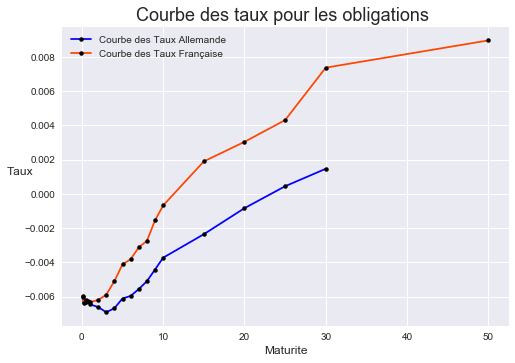

In [2]:
#Construction des tables France et Allemagne
germany_data= df[df["country"] == "Germany"]
french_data= df[df["country"] != "Germany"]

#Création des courbes
mpl.style.use('seaborn')
fig, ax= plt.subplots()
plt.grid(b= True)

ax.plot(germany_data["Maturity"]
            ,germany_data["rates"]
            , marker= '.'
            , markerfacecolor= 'black'
            , markersize= 9
            , c= 'blue'
            , label= "Courbe des Taux Allemande")

ax.plot(french_data["Maturity"]
            ,french_data["rates"]
            , marker= '.'
            , markerfacecolor= 'black'
            , markersize= 9
            , c= 'orangered'
            , label= "Courbe des Taux Française")

ax.set_ylabel("Taux", rotation= 0, fontsize= 12)
ax.set_xlabel("Maturite", fontsize= 12)
ax.set_title("Courbe des taux pour les obligations ", fontsize= 18)
ax.legend()

plt.show()


### 2.
Construire une dataframe contenant les flux de paiements reçus par échéances. Calculez le yield to maturity de chacune des positions, puis celle du portefeuille. Calculez ensuite sa duration (en fonction du yield to maturity).

In [3]:
df = pd.DataFrame(
    {
        'Name':['Compagnie des Alpes','Korian','Carrefour','Total'],
        'Coupon':[3.504,3.70,1,1.023],
        'Maturité':['24/10/2027','07/10/2025','27/10/2027','27/10/2027'],
        'Prix':[113,110.23,102.22,106.57]
    }
)
df['Coupon']=df['Coupon']/100
df['Maturité'] = [(pd.to_datetime(mat).year-pd.to_datetime('25/10/2019').year) for mat in df['Maturité']]
df

,Name,Coupon,Maturité,Prix
0,Compagnie des Alpes,0.03504,8,113.00
1,Korian,0.03700,6,110.23
2,Carrefour,0.01000,8,102.22
3,Total,0.01023,8,106.57


In [4]:
cash_flows = pd.DataFrame(columns=['Maturity','Security','Cash Flow'])
#Pour chaque obligation dans df
    # ajouter des lignes à cash_flows représentant les CF
for i,row in df.iterrows():
    for t in range(1,row['Maturité']): # Tous les CF sauf le dernier
        cash_flows = cash_flows.append(
            {
                'Maturity':t,
                'Security':row['Name'],
                'Cash Flow':row['Coupon']*100 # En supposant que le nominal vaut 100
            }, ignore_index = True
        )
    cash_flows = cash_flows.append( # Dernier CF
            {
                'Maturity':row['Maturité'],
                'Security':row['Name'],
                'Cash Flow':row['Coupon']*100 + 100 # En supposant que le nominal vaut 100
            }, ignore_index = True
        )
cash_flows = cash_flows.groupby('Maturity')['Cash Flow'].sum()
cash_flows

Maturity
1      9.227
2      9.227
3      9.227
4      9.227
5      9.227
6    109.227
7      5.527
8    305.527
Name: Cash Flow, dtype: float64

In [5]:
from scipy.optimize import newton
def yield_to_maturity(P,c,T,N):
    """
    Renvoie le yield to maturity d'une obligation. Paramètres :
        - P : le prix de l'obligation
        - c : le taux de coupon de l'obligation
        - T : la maturité de l'obligation
        - N : le nominal de l'obligation
    """
    def f(x,P,c,T,N):
        """
        Approxime la fonction de cash flows. Paramètres :
            - x : la variable permettant l'optimisation par Newton
            - P : le prix de l'obligation
            - c : le taux de coupon de l'obligation
            - T : la maturité de l'obligation
            - N : le nominal de l'obligation
        """
        result = P
        for i in range(1,int(T)):
            result -= c*N*(x**i)
        result -= N*(1+c)*(x**T)
        return result
    
    def fprime(x,P,c,T,N):
        """
        Dérivée de l'approximation de la fonction de cash flows. Paramètres :
            - x : la variable permettant l'optimisation par Newton
            - P : le prix de l'obligation
            - c : le taux de coupon de l'obligation
            - T : la maturité de l'obligation
            - N : le nominal de l'obligation
        """
        result = 0
        for i in range(1,int(T)):
            result -= i*c*N*(x**(i-1))
        result -= T*N*(1+c)*(x**(T-1))
        return result
    
    x = newton(func=f,
           x0=1.1, # puisque y est de l'ordre 0.01 et que x = 1/(1+y) 1.1 semble etre un ordre de grandeur raisonable
           fprime=fprime,
           args=(P,c,T,N)
        )
    y = 1/x - 1
    return y

In [6]:
df['yield_to_maturity'] = [yield_to_maturity(row['Prix'],row['Coupon'],row['Maturité'],100) for i,row in df.iterrows()]
df

,Name,Coupon,Maturité,Prix,yield_to_maturity
0,Compagnie des Alpes,0.03504,8,113.00,0.017486
1,Korian,0.03700,6,110.23,0.018810
2,Carrefour,0.01000,8,102.22,0.007135
3,Total,0.01023,8,106.57,0.001945


In [7]:
# Le yield to maturity est un opérateur linéaire ?
portfolio_yield_to_maturity = df['yield_to_maturity'].sum()/df.shape[0]
portfolio_yield_to_maturity

0.011344050816573747

In [18]:
def duration(c,T,N,y):
    """
    Renvoie la duration d'une obligation. Paramètres :
        - c : le taux de coupon de l'obligation
        - T : la maturité de l'obligation
        - N : le nominal de l'obligation
        - y : le yield to return de l'obligation
    """
    result = 0
    for i in range(1,int(T)):
        CF_i = c*N
        result -= (i*CF_i)/((1+y)**(i+1))
    CF_T = c*N+N
    result -= (T*CF_T)/((1+y)**(T+1))
    return result

In [9]:
df['duration'] = [duration(row['Coupon'],row['Maturité'],100,row['yield_to_maturity']) for i,row in df.iterrows()]
df

,Name,Coupon,Maturité,Prix,yield_to_maturity,duration
0,Compagnie des Alpes,0.03504,8,113.00,0.017486,-796.884068
1,Korian,0.03700,6,110.23,0.018810,-596.997700
2,Carrefour,0.01000,8,102.22,0.007135,-784.749514
3,Total,0.01023,8,106.57,0.001945,-822.482275


In [10]:
# La duration est un opérateur linéaire
portfolio_duration = df['duration_y'].sum()/df.shape[0]
portfolio_duration

-750.2783893053507

### 3.
On appelle $D_i$ l’exposition du portefeuille à un mouvement du taux zéro-coupon i. L’exposition du portefeuille à l’ensemble des taux est $D =\sum_i D_i$ avec $D_i=\frac{\partial V_i}{\partial z_i}$ et $V_i=\frac{CF_i}{(1+z_i)^i}$

Calculez D pour les taux zéro-coupons allemands puis français. Comment expliquer la différence obtenue ? Pour les deux courbes de taux
à quelle maturité la duration est-elle la plus forte ? Pourquoi ?

$V_i=\frac{CF_i}{(1+z_i)^i}=CF_i(1+z_i)^{-i}$

$D_i=\frac{\partial V_i}{\partial z_i} = -iCF_i(1+z_i)^{-(i+1)} = \frac{-iCF_i}{(1+z_i)^{i+1}}$

In [99]:
#=========== TBC ==========

def duration_per_maturity(c,T,N,y,max_maturity):
    """
    Renvoie la duration d'une obligation pour chaque échéances. Paramètres :
        - c : le taux de coupon de l'obligation
        - T : la maturité de l'obligation
        - N : le nominal de l'obligation
        - y : le yield to return de l'obligation
    """
    durations = []
    for i in range(1,max_maturity+1):
        if i < T:
            durations.append(-(T*(c*N))/((1+y)**(T+1)))
        elif i == T:
            durations.append(- (T*(c*N+N))/((1+y)**(T+1)))
        else:
            durations.append(0)
    return np.array(durations)

In [101]:
# ============= Test avec notre portefeuille =========
durations_per_maturity = np.zeros(max(df['Maturité']))
for i,row in df.iterrows():
    durations_per_maturity += duration_per_maturity(
        c=row['Coupon'], T=row['Maturité'], N=row['Prix'], y=row['yield_to_maturity'], max_maturity=max(df['Maturité'])
    )
durations_per_maturity

array([  -64.82005395,   -64.82005395,   -64.82005395,   -64.82005395,
         -64.82005395,  -645.31497475,   -43.34174188, -2421.60833434])

In [80]:
french_data['exposition_portefeuille'] = [duration(c= row['coupon'], T=row['Maturity'], N=100, y=row['rates']) 
                                          for j,row in french_data.iterrows()]
germany_data['exposition_portefeuille'] = [duration(c= row['coupon'], T=row['Maturity'], N=100, y=row['rates']) 
                                          for j,row in germany_data.iterrows()]

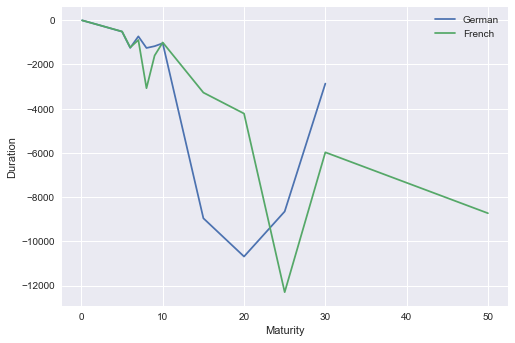

In [50]:
plt.plot(germany_data['Maturity'], germany_data['exposition_portefeuille'],label='German')
plt.plot(french_data['Maturity'], french_data['exposition_portefeuille'], label='French')
plt.legend()
plt.ylabel('Duration')
plt.xlabel('Maturity')
plt.show()

### 4.
On souhaite désormais couvrir le risque d’un mouvement de courbe des taux. Pour cela, on va shorter des obligations souveraines (on utilise les obligations présentes dans la Table data_tp3). Nous cherchons donc à nous immuniser contre 8 risques, correspondants aux 8 maturités de la courbe des taux. Pour cela, on considère 8 obligations souveraines : O1, ..., O8 et l’on cherche les quantités φ1, ...φ8 annulant un mouvement de la courbe des taux.

On pose D, le vecteur de durations du portefeuille aux maturités 1,...,8 : 
$D = \begin{bmatrix} D1 & ... & D8\end{bmatrix}$ ; Φ, le vecteur de quantités des actifs souverains $Φ = \begin{bmatrix}φ1 & ... & φ8\end{bmatrix}$ ; et $D_0$ la matrice carrée telle que :

$D_0=\begin{bmatrix}
\frac{\partial O_1}{\partial z_1} & ... & \frac{\partial O_8}{\partial z_1} \\
... &  & ... \\
\frac{\partial O_1}{\partial z_8} & ... & \frac{\partial O_8}{\partial z_8}
\end{bmatrix}$

On rappelle qui si $D_O$ est inversible, alors : $\Phi = -DD_0^{-1}$

Dans un premier temps, on cherche se couvrir contre des mouvements de taux 1 an et de taux 8 ans. On utilise les obligations souveraines correspondants aux maturités 1 et 8.
**Dans Python, utiliser les fonctions np.dot et np.linalg.inv**.

### 5.
Calculez désormais les quantités d’actifs nécessaires pour se couvrir contre une variation de l’ensemble de la courbe des taux.